In [423]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 


In [424]:
from tensorflow.keras.datasets import mnist

In [425]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

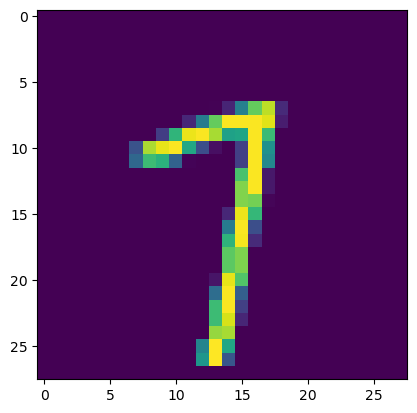

In [426]:
plt.imshow(X_train[42])

In [427]:
print(X_train.max())
print(X_train.min())

255
0


In [428]:
X_train = X_train/255
X_test = X_test/255

In [429]:
from tensorflow.keras.utils import to_categorical

In [430]:
y_cat_test = to_categorical(y_test, num_classes=10)
y_cat_train = to_categorical(y_train, num_classes=10)

In [431]:
X_train[0].max()

1.0

In [432]:
X_test[0].shape

(28, 28)

In [433]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [434]:
# model = Sequential()

# model.add(Dense(128, activation="relu"))
# model.add(Dense(64, activation="relu"))

# model.add(Dense(10, activation="softmax"))

# model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))

model.add(Dense(256, activation="relu", input_shape=(784, )))
model.add(Dense(128, activation="relu"))



model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [435]:
from tensorflow.keras.callbacks import EarlyStopping

In [436]:
early_stop = EarlyStopping(monitor="val_loss", patience=1)

In [437]:
model.fit(X_train, y_cat_train, epochs=10, validation_data=(X_test, y_cat_test), callbacks=[early_stop])
# model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stop])
# model.fit(X_train, y_cat_train, epochs=600)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2046 - accuracy: 0.9387 - val_loss: 0.1009 - val_accuracy: 0.9671
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0864 - accuracy: 0.9737 - val_loss: 0.0877 - val_accuracy: 0.9732
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0582 - accuracy: 0.9816 - val_loss: 0.0796 - val_accuracy: 0.9761
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0442 - accuracy: 0.9857 - val_loss: 0.0794 - val_accuracy: 0.9770
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0350 - accuracy: 0.9887 - val_loss: 0.0785 - val_accuracy: 0.9775
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0268 - accuracy: 0.9906 - val_loss: 0.0889 - val_accuracy: 0.9770


In [438]:
metrics = pd.DataFrame(model.history.history)

<Axes: >

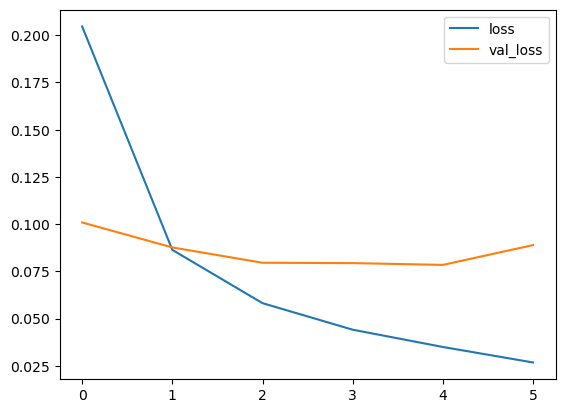

In [439]:
metrics[["loss", "val_loss"]].plot()

<Axes: >

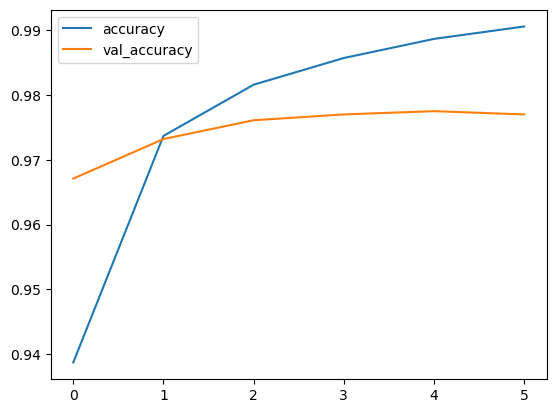

In [440]:
metrics[["accuracy", "val_accuracy"]].plot()

In [441]:
model.evaluate(X_test, y_cat_test, verbose=0)

[0.08893769979476929, 0.9769999980926514]

In [442]:
from sklearn.metrics import classification_report, confusion_matrix

In [443]:
predictions = np.argmax(model.predict(X_test), axis=1)

313/313 [==============================] - 0s 823us/step


In [444]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.99      0.97      0.98      1010
           4       0.99      0.96      0.97       982
           5       0.96      0.98      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.95      0.98      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [445]:
confusion_matrix(y_test, predictions)

array([[ 970,    1,    0,    2,    0,    0,    3,    0,    2,    2],
       [   0, 1129,    1,    0,    0,    0,    1,    0,    4,    0],
       [   7,    4, 1001,    1,    1,    0,    3,    5,    9,    1],
       [   0,    0,    4,  977,    0,   16,    0,    6,    2,    5],
       [   1,    0,    2,    0,  947,    1,    6,    1,    0,   24],
       [   1,    0,    0,    3,    0,  876,    4,    0,    4,    4],
       [   6,    3,    0,    1,    2,    5,  941,    0,    0,    0],
       [   1,    5,    8,    1,    1,    1,    0,  995,    5,   11],
       [   4,    1,    2,    2,    3,    6,    3,    3,  943,    7],
       [   2,    2,    1,    1,    7,    3,    0,    1,    1,  991]])

In [446]:
test_num = X_test[42]


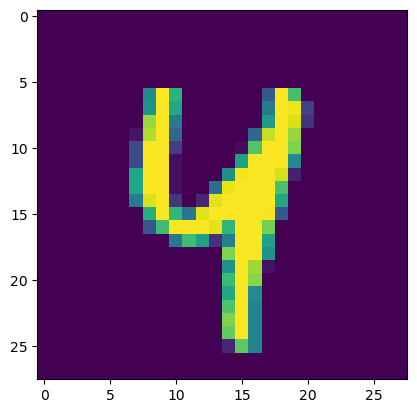

In [447]:
plt.imshow(test_num)

In [448]:
np.argmax(model.predict(test_num.reshape(1, 28, 28, 1)))

1/1 [==============================] - 0s 52ms/step


4